In [1]:
import csv, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def list_to_csv(ls, filename):
    with open(filename, "w") as outfile:
        for x in ls:
            outfile.write(str(x))
            outfile.write("\n")

In [3]:
sample_range = 5*math.pi
samples = np.arange(-sample_range, sample_range, 0.01)

In [4]:
# list_to_csv(samples, '../data/pi_samples.csv')

In [5]:
len(samples)

3142

In [6]:
def sinc(data):
    result = []
    for x in data:
        result.append(math.sin(x)/x)
    return result

In [7]:
def sin(data):
    result = []
    for x in data:
        result.append(math.sin(x))
    return result

In [8]:
def s0_sin(x, r, terms):
    sinx = 0
    for i in range(terms):
        coeff = (-1)**i * (1/math.factorial(2*i+1)) * (1/2**r)**(2*i+1)
        sinx = sinx + coeff * x**(2*i+1)
    return sinx

In [9]:
def s0(x, r, terms):
    sincx = 0
    for i in range(terms):
        coeff = (-1)**i * (1/math.factorial(2*i+1)) * (1/2**r)**(2*i)
        sincx = sincx + coeff * x**(2*i)
    return sincx

In [10]:
def c0(x, r, terms):
    cosx = 0
    for i in range(terms):
        coeff = (-1)**i * (1/math.factorial(2*i)) * (1/2**r)**(2*i)
        cosx = cosx + coeff * x**(2*i)
    return cosx

In [11]:
def sinc_approx(x, num_iter, terms):
#     sk = s0(x, num_iter, terms)
#     ck = c0(x, num_iter, terms)
    sinc = s0(x, num_iter, terms)
#     sinc = math.sin(x)/x
#     sin = math.sin(x)
#     cos = math.cos(x)
    cos = c0(x, num_iter, terms)
    sinc1 = sinc
    for i in range(num_iter):
        cos1 = 1 - 2*(x**2)*(sinc**2)
        sinc1 = sinc*cos
#         sin1 = 2*sin*cos
        
        sinc = sinc1
        cos = cos1
#         sin = sin1
    return sinc

In [12]:
def sinc_approx_series(data, num_iter, terms):
    result = []
    for x in data:
        result.append(sinc_approx(x, num_iter, terms))
    return result

In [13]:
def sin_approx_series(data, num_iter, terms):
    result = []
    for x in data:
        result.append(sin_approx(x, num_iter, terms))
    return result

In [14]:
def sin_approx(x, num_iter, terms):
    sk = s0_sin(x, num_iter, terms)
    ck = c0(x, num_iter, terms)
    sk1 = sk
    for i in range(num_iter):
        ck1 = ck**2 - sk**2
        sk1 = 2*sk*ck
        
        sk = sk1
        ck = ck1
    return sk1

In [15]:
# df_sin_interpolated_heaan = pd.read_csv('data/sine_interpolated_heaan.csv', names=['Sine'], header=None)
# sin_interpolated_heaan = df_sin_interpolated_heaan.Sine.tolist()

In [16]:
num_iter = 3
terms = 3

In [17]:
sinc_exact = sinc(samples)

In [18]:
sin_exact = sin(samples)

In [19]:
sin_approx = sin_approx_series(samples, num_iter, terms)

In [20]:
sinc_approx = sinc_approx_series(samples, num_iter, terms)
# sinc_approx = s0(samples, num_iter, terms)

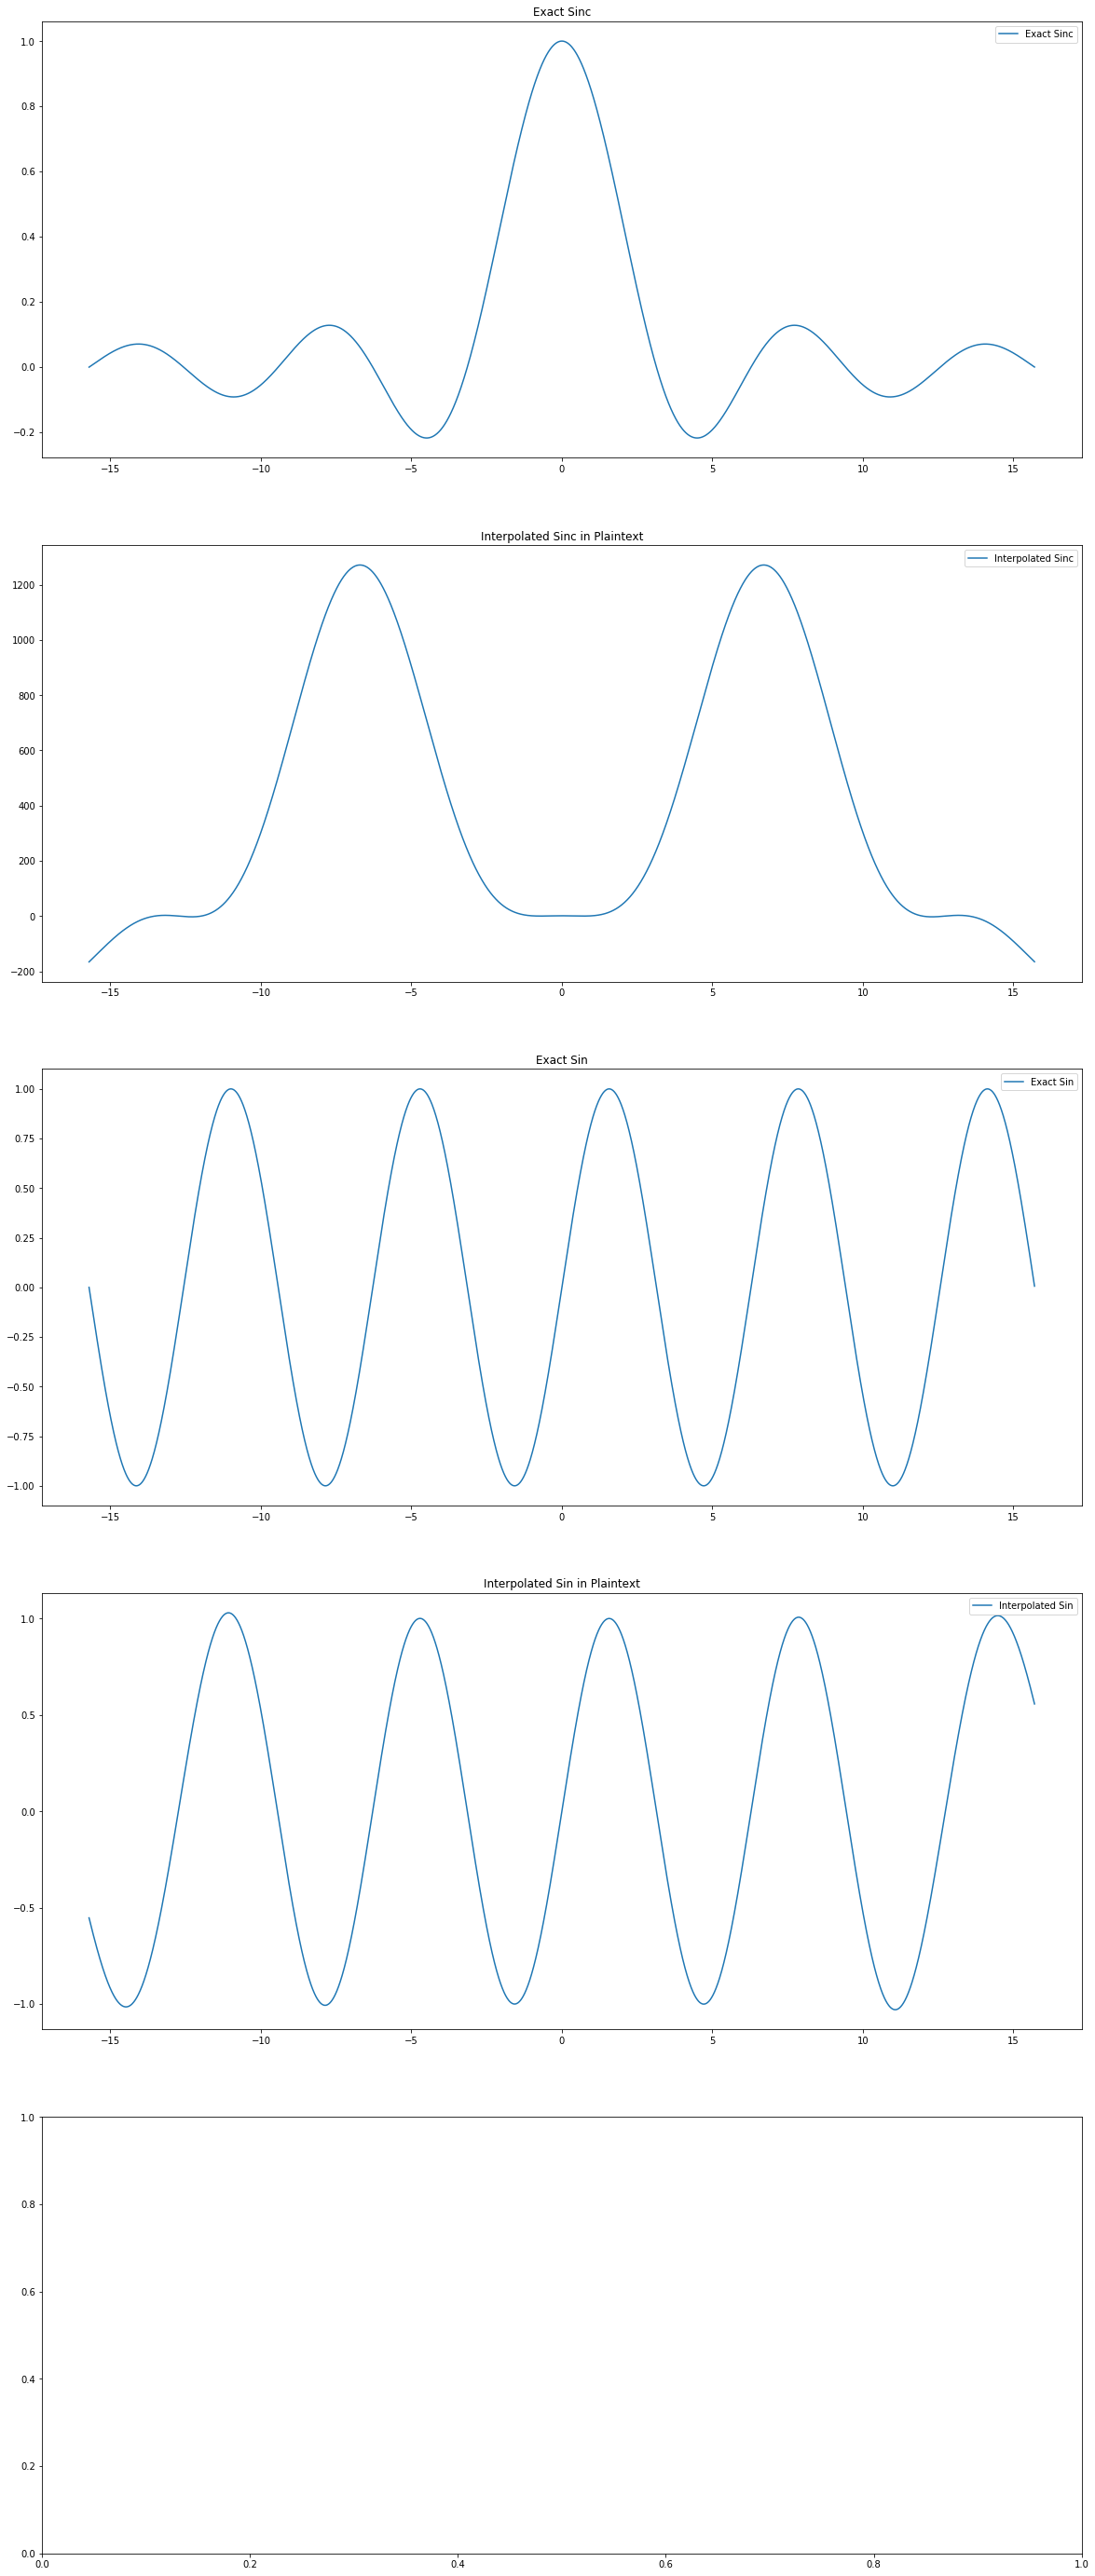

In [21]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize = (20, 50))

ax1.plot(samples, sinc_exact, label='Exact Sinc')
ax1.set_title('Exact Sinc')
ax1.legend()

ax2.plot(samples, sinc_approx, label='Interpolated Sinc')
ax2.set_title('Interpolated Sinc in Plaintext')
ax2.legend()

ax3.plot(samples, sin_exact, label='Exact Sin')
ax3.set_title('Exact Sin')
ax3.legend()

ax4.plot(samples, sin_approx, label='Interpolated Sin')
ax4.set_title('Interpolated Sin in Plaintext')
ax4.legend()

# ax5.plot(samples, sin_interpolated_heaan, label='Interpolated Sin')
# ax5.set_title('Interpolated Sin in Ciphertext')
# ax5.legend()

plt.show()